# Spatiotemporal maps of Emergency Braking EEG data 
<br>

<hr>

## Description

This notebook plot spatiotemporal maps of the segments containing braking events from EEG Emergancy braking data. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pandas as pd 

## <font color='blue'> Import learning data </font>

Import spatial coordinates of electrodes

In [2]:
path_data_mat = '/Users/obando_c/Documents/Neuro/EmergencyBraking/Data/Raw/'
file_name = "VPja.mat" # VPja.mat ; VPbax.mat
with h5py.File(path_data_mat + file_name, 'r') as f:
    mnt = f.get('mnt')
    x_pos_allChannels = np.array(mnt.get('x'))
    y_pos_allChannels = np.array(mnt.get('y'))
    #pos3d_allChannels = np.array(mnt.get('pos_3d'))  # coord in 3D 
#pos3d_eegChannels = pos3d_allChannels[np.delete(np.arange(61), [0, 5])] # coord in 3D for eeg channels

Import events segments for subject VPJa (320 time points corresponds to $320*5 = 1600ms$

In [3]:
test_id = "VPja.mat" # Not used here
df_eeg_event_file = '/Users/obando_c/Documents/Neuro/EmergencyBraking/Data/fromJupyter/df_eeg_only_events.csv' # Corresponds to VPja
#Lecture
df_eeg_events = pd.read_csv( df_eeg_event_file )

## <font color='blue'> Spatio-temporal maps </font>

Take only EEG channels 

In [4]:
channels_eeg = np.delete(np.arange(61), [0, 5])

Extract 2D positions of channels_eeg

In [5]:
x_pos = x_pos_allChannels[0][channels_eeg]
y_pos = y_pos_allChannels[0][channels_eeg]

### Maximum amplitud value over time per electrode

In [6]:
max_value_temporal = np.asarray(df_eeg_events.max(1)).reshape(224,59).mean(0)
max_std_temporal = np.asarray(df_eeg_events.max(1)).reshape(224,59).std(0)

Plot

In [7]:
from scipy.interpolate import griddata
xi = np.linspace(-2,6,300);
yi = np.linspace(-2,6,300);

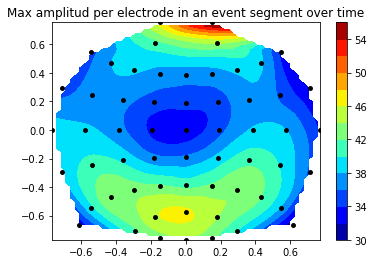

In [8]:
zi = griddata((x_pos, y_pos), max_value_temporal, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='k',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))
plt.title('Max amplitud per electrode in an event segment over time')

plt.show()

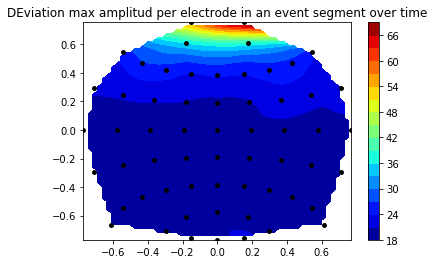

In [9]:
zi = griddata((x_pos, y_pos), max_std_temporal, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='k',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))
plt.title('DEviation max amplitud per electrode in an event segment over time')

plt.show()

### Maximum amplitud value per subsegments

In [10]:
max_value_interval = np.asarray(df_eeg_events).reshape(13216*4,80).max(1).reshape(13216,4).reshape(224,59*4).mean(0).reshape(59,4)
print(max_value_interval.shape)

(59, 4)


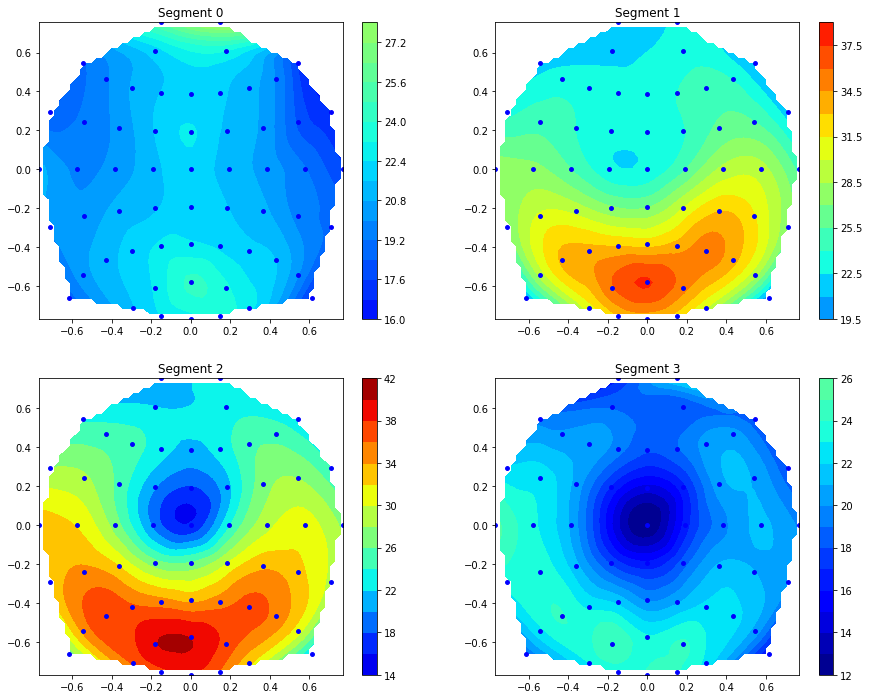

In [12]:
plt.figure(figsize=(15,12))
#fig, axes = plt.subplots(nrows=2, ncols=2)
for i in range(max_value_interval.shape[1]):
    #
    plt.subplot(2, 2, i+1)
    zi = griddata((x_pos, y_pos), max_value_interval[:,i], (xi[None,:], yi[:,None]), method='cubic')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet, vmin=12, vmax=42)
    plt.colorbar()
    plt.scatter(x_pos,y_pos,marker='o',c='b',s=15)
    plt.xlim(min(x_pos),max(x_pos))
    plt.ylim(min(y_pos),max(y_pos))
    plt.title('Segment ' + str(i))
fig.tight_layout() 
plt.show()